In [13]:
import sys

sys.path.append("../../src/")

import os

import numpy as np
import pandas as pd
from skimage import color, io, measure
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from matplotlib import pyplot as plt
from sklearn import metrics, preprocessing, linear_model

from transforms import FourierTransform2D, WaveletTransform2D, compress_and_decompress,denoise_gaussian
from utils import apply_rgb

In [14]:
images = {}

for image_path in os.listdir("/Users/jakubgodlewski/PycharmProjects/KZFourier/data"):
    if image_path .endswith(".jpg"):
        image = io.imread(f"/Users/jakubgodlewski/PycharmProjects/KZFourier/data/{image_path }")
        name, suffix = image_path.split(".")
        images[name] = image



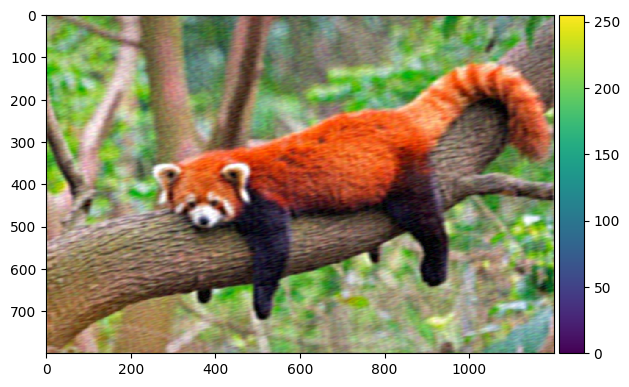

In [15]:

decompressed_image = apply_rgb(compress_and_decompress, images["panda"], transform=FourierTransform2D(), compression=0.99)
_ = io.imshow(np.clip(decompressed_image.astype(int), 0, 255))

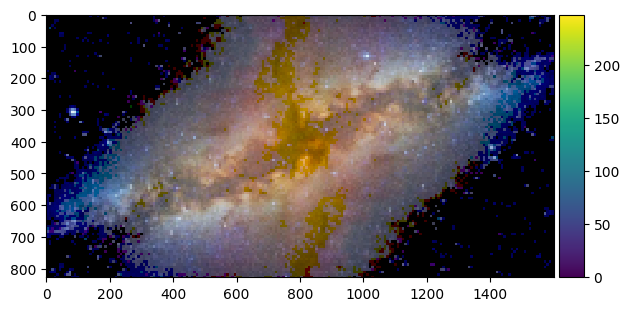

In [16]:
decompressed_image = apply_rgb(compress_and_decompress, images["milkyway"], transform=WaveletTransform2D(wavelet_name="db1", level=3), compression=0.99)
_ = io.imshow(np.clip(decompressed_image.astype(int), 0, 255))

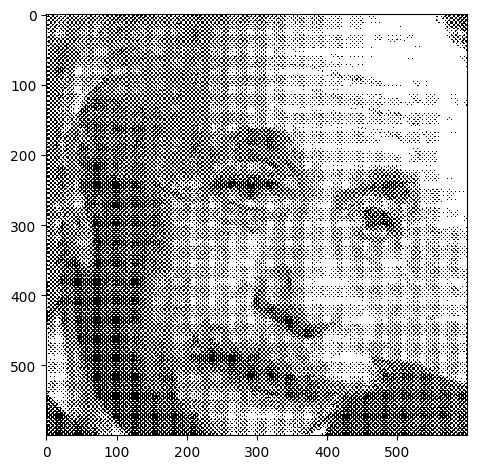

In [17]:
image = color.rgba2rgb(images["einstein"])
noisy_image = image
io.imshow(noisy_image,cmap='grey')
denoised_image = denoise_gaussian(noisy_image,sigma=20)

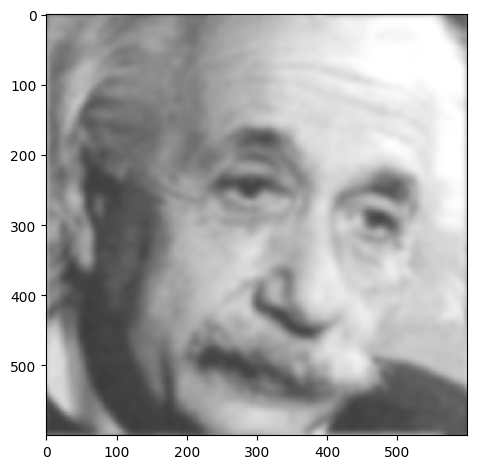

In [18]:
io.imshow(denoised_image, cmap='gray')